In [267]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

In [268]:
sentim = pd.read_csv('tweet_sentiment_analysis.csv')
sentim = sentim.iloc[:, 2:]
sentim.columns = ['Name', 'Party', 'Twitter', 'Bill', 'Tweet', 'Sent', 'Average', 'Median', 'Range', 'Variance', 'SD']
sentim['Name'] = sentim['Name'].apply(lambda x: x.lower().strip())
sentim = sentim.drop(['SD', 'Variance', 'Range'], 1)

In [269]:
govtrack = pd.read_csv('govtrack.csv')
govtrack['vote'] = govtrack['vote'].apply(lambda x: 0 if x == -1 else -1 if x == 0 else x)
govtrack.columns = ['State', 'Vote', 'Name', 'Party', 'Bill']

In [272]:
votes = sentim.copy().merge(govtrack.copy(), how = 'left', on = ['Name', 'Party', 'Bill'])

In [273]:
#votes_mod = votes[~votes['Name'].isin(pd.Series(votes[votes['Vote'].isnull()].Name.unique()))]

In [274]:
senators = ['chuck grassley',
            'clay higgens',
            'john barrasso',
            'john cornyn',
            'john thune',
            'joni ernst',
            'marco rubio',
            'mike enzi',
            'mitch mcconnell',
            'mitt romney',
            'rob porman']

In [275]:
votes_mod = votes[~votes['Name'].isin(senators)]

In [276]:
votes_mod['Vote'] = votes_mod['Vote'].fillna(0)
votes_mod['Sent'] = votes_mod['Sent'].apply(ast.literal_eval)
votes_mod.index = range(len(votes_mod))
votes_mod['Tweet'] = votes_mod['Tweet'].apply(ast.literal_eval)
# votes_mod['Ave Label'] = sentim['Average'].apply(np.sign)
# votes_mod['Med Label'] = sentim['Median'].apply(np.sign)

/Users/alexluo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/alexluo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/alexluo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [277]:
def weigh(x):
    return np.sign(sum(x))

In [278]:
votes_mod['Label'] = votes_mod['Sent'].apply(weigh)

/Users/alexluo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [279]:
votes_mod['Consistent'] = votes_mod['Label'] == votes_mod['Vote']

/Users/alexluo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [301]:
votes_mod[votes_mod['Consistent']]

,Name,Party,Twitter,Bill,Tweet,Sent,Average,Median,State,Vote,Label,Consistent
1,daniel webster,R,@RepWebster,Save the Internet,"[Great to tour @ThatCompanycom, an internet ma...","[-0.800000011920929, 0.20000000298023224]",-0.300000,0.2,FL,-1.0,-1.0,True
7,mo brooks,R,@RepMoBrooks,Save the Internet,[Proud to support passage of #HR3086 to perman...,[-0.4000000059604645],-0.400000,-0.4,AL,-1.0,-1.0,True
8,juan vargas,D,@RepJuanVargas,Save the Internet,[Your internet service provider should not con...,"[0.8999999761581421, 0.20000000298023224, 0.89...",0.166667,0.2,CA,1.0,1.0,True
9,marcy kaptur,D,@RepMarcyKaptur,Save the Internet,"[The #SaveTheNet Act is bipartisan, popular, a...","[0.30000001192092896, 0.8999999761581421, -0.0...",0.105556,0.2,OH,1.0,1.0,True
11,elijah cummings,D,@RepCummings,Save the Internet,[The internet must remain open and accessible ...,"[-0.10000000149011612, -0.10000000149011612, 0...",0.050000,-0.0,MD,1.0,1.0,True
12,katherine clark,D,@RepKClark,Save the Internet,[RT @RepMcEachin: Your internet service provid...,"[0.8999999761581421, 0.10000000149011612, -0.0...",0.021053,-0.0,MA,1.0,1.0,True
18,steve stivers,R,@RepSteveStivers,Save the Internet,"[JUST NOW: The Open internet Preservation Act,...","[-0.800000011920929, -0.30000001192092896]",-0.550000,-0.3,OH,-1.0,-1.0,True
19,ruben gallego,D,@RepRubenGallego,Save the Internet,[Your internet service provider should not con...,"[0.8999999761581421, 0.8999999761581421, -0.80...",0.333333,0.9,AZ,1.0,1.0,True
22,jackie speier,D,@RepSpeier,Save the Internet,"[The internet is the modern public square, nec...","[-0.8999999761581421, -0.8999999761581421, -0....",0.020000,-0.0,CA,1.0,1.0,True
26,mark takano,D,@RepMarkTakano,Save the Internet,[I just voted to restore #NetNeutrality. Your ...,"[0.699999988079071, 0.20000000298023224, 0.699...",0.319048,0.3,CA,1.0,1.0,True


In [294]:
# CONSISTENCY SCORES

In [298]:
overall_cons = votes_mod['Consistent'].mean()
overall_cons

0.4171632896305125

In [292]:
by_name = votes_mod.groupby(['Name'])['Consistent'].mean()
by_name

Name
adam kinzinger              0.750000
adam schiff                 0.500000
adrian smith                0.750000
alan lowenthal              0.375000
alexandria ocasio-cortez    0.500000
annie kuster                0.000000
austin scott                0.875000
barbra lee                  0.000000
barry loudermilk            0.875000
bill foster                 0.125000
bill huizenga               0.750000
bill johnson                0.875000
bob gibbs                   0.875000
bob latta                   0.000000
brenda lawrence             0.375000
brian babin                 0.875000
cathy rodgers               0.000000
cheri bustos                0.125000
chip roy                    0.714286
dan kildee                  0.000000
dan newhouse                0.750000
daniel webster              0.875000
david b mckinley            0.000000
deb dingell                 0.000000
debbie wasserman schultz    0.625000
derek kilmer                0.125000
devin nunes                 0.750

In [335]:
# same as above but with party labeled
by_name_party = votes_mod.groupby(['Name', 'Party'])['Consistent'].mean()
by_name_party

Name                      Party
adam kinzinger            R        0.750000
adam schiff               D        0.500000
adrian smith              R        0.750000
alan lowenthal            D        0.375000
alexandria ocasio-cortez  D        0.500000
annie kuster              D        0.000000
austin scott              R        0.875000
barbra lee                D        0.000000
barry loudermilk          R        0.875000
bill foster               D        0.125000
bill huizenga             R        0.750000
bill johnson              R        0.875000
bob gibbs                 R        0.875000
bob latta                 R        0.000000
brenda lawrence           D        0.375000
brian babin               R        0.875000
cathy rodgers             R        0.000000
cheri bustos              D        0.125000
chip roy                  R        0.714286
dan kildee                D        0.000000
dan newhouse              R        0.750000
daniel webster            R        0.875000


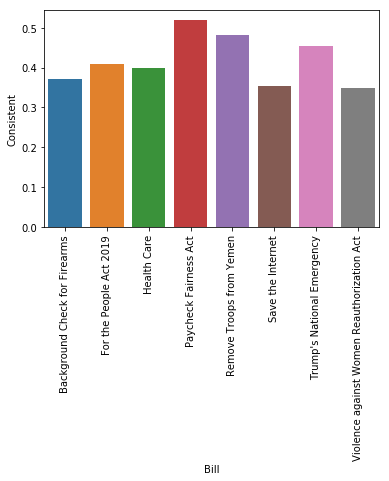

In [342]:
by_bill = votes_mod.groupby(['Bill'])['Consistent'].mean()
sns.barplot(x = by_bill.index, y = by_bill).set_xticklabels(labels = by_bill.index, rotation=90);

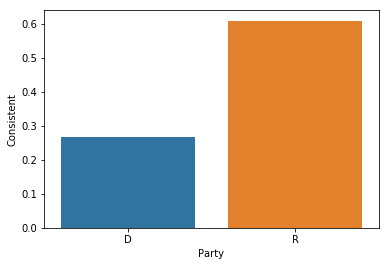

In [345]:
by_party = votes_mod.groupby(['Party'])['Consistent'].mean()
sns.barplot(x = by_party.index, y = by_party);

In [354]:
party_bill_ind = [x + ": " + y for x,y in by_party_bill.index]

In [361]:
by_party_bill = votes_mod.groupby(['Party', 'Bill'])['Consistent'].mean()
sns.barplot(x = party_bill_ind, y = by_party_bill, color = ['red','blue']).set_xticklabels(labels = party_bill_ind, rotation=90);

ValueError: Invalid RGBA argument: ['red', 'blue']

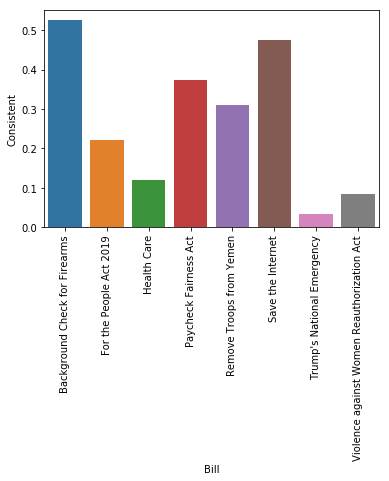

In [346]:
dems = votes_mod[votes_mod['Party'] == 'D'].copy()
dems['Consistent'] = dems['Sent'].apply(weigh_D) == dems['Vote']
dems_by_bill = dems.groupby('Bill')['Consistent'].mean()
sns.barplot(x = dems_by_bill.index, y = dems_by_bill).set_xticklabels(labels = dems_by_bill.index, rotation=90);

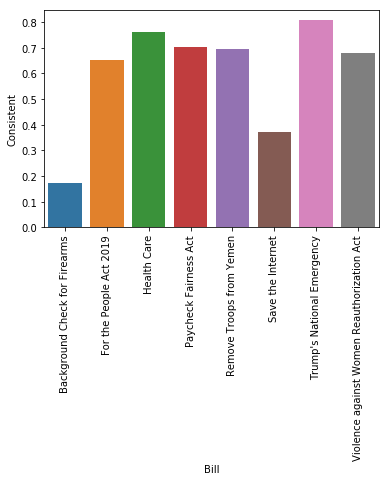

In [347]:
reps = votes_mod[votes_mod['Party'] == 'R'].copy()
reps_by_bill = reps.groupby('Bill')['Consistent'].mean()
sns.barplot(x = reps_by_bill.index, y = reps_by_bill).set_xticklabels(labels = reps_by_bill.index, rotation=90);

In [314]:
def weigh_D(sent):
    if 1 in sent:
        return 1
    elif -1 in sent:
        return -1
    else:
        return np.sign(np.sum(sent))

In [55]:
def label_sent(val):
    if val < -0.05:
        return -1
    elif val > 0:
        return 1
    else:
        return 0

In [60]:
votes_mod
votes_mod['Ave Label'] = sentim['Average'].apply(np.sign)
votes_mod['Med Label'] = sentim['Median'].apply(np.sign)

/Users/alexluo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/alexluo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [271]:
combined = votes_mod.drop(['Ave Label', 'Med Label'], 1)
combined.to_csv('votes_tweets.csv', index = False)

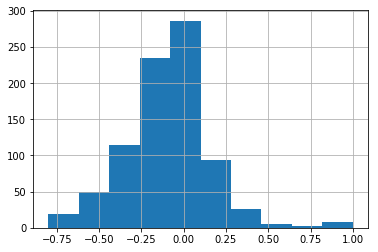

In [340]:
votes_mod['Median'].hist()

In [ ]:
# individual consistency
# consistency conditional on bill
# consistency among republicans
# consistency among democrats